## **BLINKIT ANALYSIS PROJECT**

In [1]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# import csv file

df=pd.read_csv('H:/Data Analyst/Python/Blinkit Analysis Project/blinkit_data.csv', encoding= 'unicode_escape')

In [3]:
df.head(5)

,ï»¿Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
#Size of data

df.shape

(8523, 12)

In [5]:
# column information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ï»¿Item Fat Content        8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Column type

df.dtypes

ï»¿Item Fat Content           object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **DATA CLEANING**


In [7]:
df.columns

Index(['ï»¿Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
# Rename Column name

df.rename(columns= {'ï»¿Item Fat Content':'Item Fat Content'}, inplace=True)

In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [10]:
# Finding unique values in the column 

print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [11]:
# Changing values in column using .replace function

df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                       'low fat':'Low Fat',
                                                       'reg':'Regular'})

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## **Business Rquirements**

### **KPI's**

In [13]:
#Total Sales

total_sales= df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.0f}")

Total Sales: $1,201,681


In [14]:
# Average Sales

avg_sales=df['Sales'].mean()
print(f"Average Sales: ${avg_sales:,.1f}")

Average Sales: $141.0


In [15]:
# No. Of Items Sold

item_sold= df['Sales'].count()
print(f"Item Sold: {item_sold:,.0f}")

Item Sold: 8,523


In [16]:
# Average Ratings

avg_rating= df['Rating'].mean()
print(f"Average Rating: {avg_rating:,.1f}")

Average Rating: 4.0


### **Charts**

<function matplotlib.pyplot.show(close=None, block=None)>

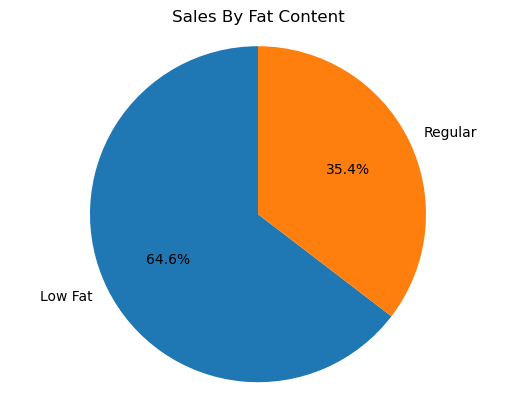

In [18]:
# Total Sales By Fat Content

sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index,autopct= '%.1f%%', startangle=90)
plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show


Low-fat products dominate total sales (64.6%) compared to regular fat (35.4%), indicating a stronger customer preference for healthier options.

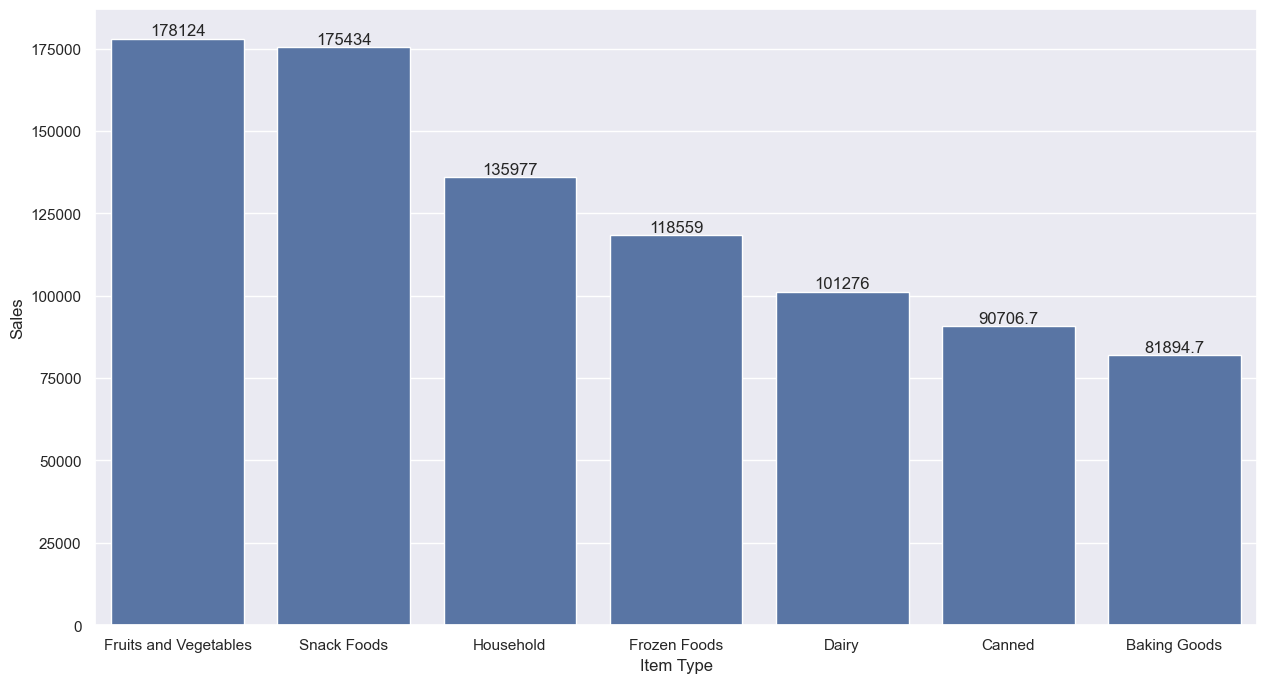

In [20]:
# Total Sales By Item Type

sales_by_type= (df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).reset_index().head(7))

sns.set(rc={'figure.figsize':(15,8)})

ax=sns.barplot(x = 'Item Type',y= 'Sales' ,data = sales_by_type)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Fruits & Vegetables and Snack Foods generate the highest sales, while Baking Goods and Canned items contribute the least, indicating demand is strongest for fresh and ready-to-eat products.

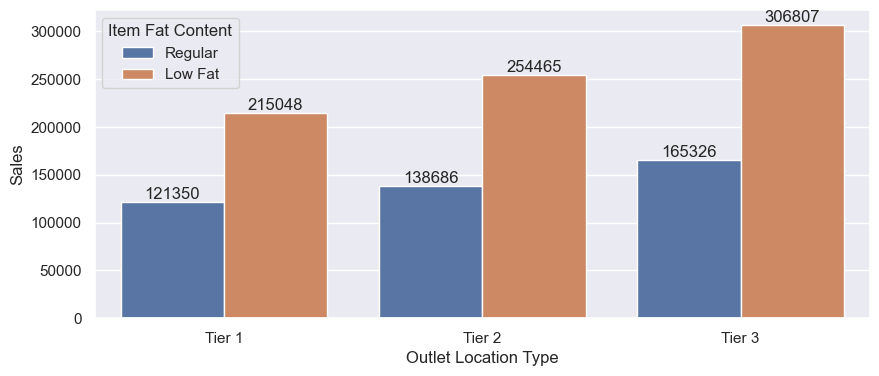

In [51]:
#Fat Content by outlet for total sales

sales_by_location= (df.groupby(['Item Fat Content','Outlet Location Type'])['Sales'].sum().sort_values(ascending=True).reset_index().head(7))

sns.set(rc={'figure.figsize':(10,4)})

ax=sns.barplot(x = 'Outlet Location Type',y= 'Sales' ,hue='Item Fat Content' ,data = sales_by_location)

for bars in ax.containers:
    ax.bar_label(bars)

Low-fat products consistently outperform regular items across all outlet tiers, with Tier 3 generating the highest overall sales.

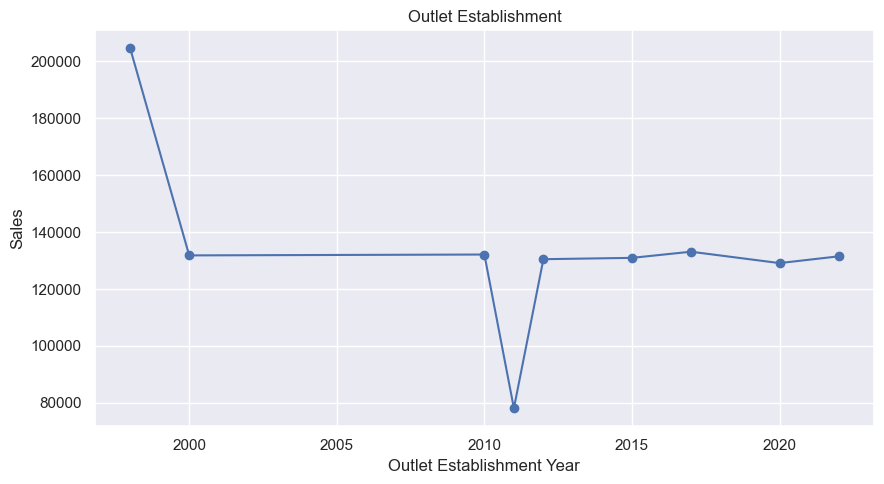

In [40]:
# Sales by outlet establishment year

sales_by_year= df.groupby('Outlet Establishment Year')['Sales'].sum().sort_values(ascending=False).sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.title('Outlet Establishment')

plt.tight_layout()



Sales were highest for the oldest outlets (around 1998), dropped sharply for 2011 establishments, and remained relatively stable for newer outlets.

<function matplotlib.pyplot.show(close=None, block=None)>

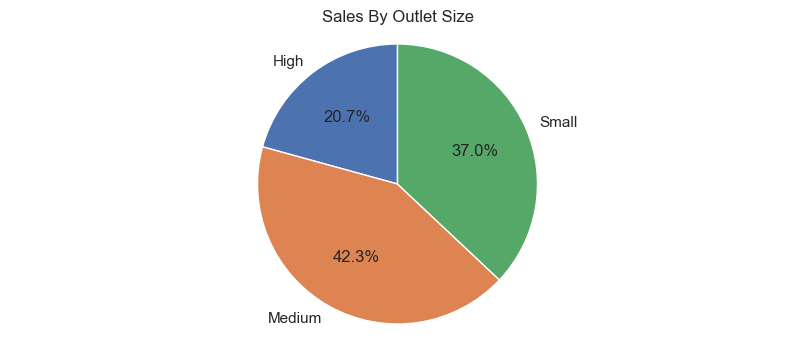

In [43]:
# Sales by oulet size

sales_by_size= df.groupby('Outlet Size')['Sales'].sum()

plt.pie(sales_by_size, labels=sales_by_size.index,autopct= '%.1f%%', startangle=90)
plt.title('Sales By Outlet Size')
plt.axis('equal')
plt.show

Medium-sized outlets contribute the highest sales (42.3%), followed by small (37%), while large outlets generate the least (20.7%).

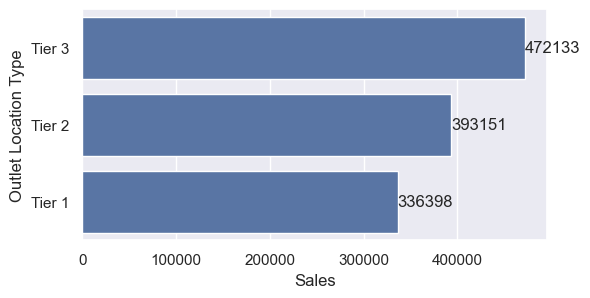

In [50]:
# Sales by outlet location

sales_by_location= (df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False).reset_index())

sns.set(rc={'figure.figsize':(6,3)})

ax=sns.barplot(x = 'Sales',y= 'Outlet Location Type' ,data = sales_by_location)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


Tier 3 outlets generate the highest sales, followed by Tier 2 and Tier 1, indicating stronger performance in higher-tier locations.

## **Conclusion**

Overall, the analysis shows that Low Fat products dominate sales (64.6% vs 35.4%), with Fruits & Vegetables (178K) and Snack Foods (175K) being the top-performing categories, while Baking Goods (82K) lag behind. Tier 3 outlets lead with 472K sales, followed by Tier 2 (393K) and Tier 1 (336K), and Medium-sized outlets contribute the most (42.3%), indicating that mid-sized stores in higher-tier locations drive maximum revenue.